# Machine Learning 2 Assignment
### Submitted By Shaikh Muhammad Asjad Raza
### Please install plotly library for 3D visualization: conda install -c plotly plotly 

In [287]:
import pandas as pd
from sklearn.datasets import make_blobs
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import sympy as sympy
import numpy as np
from scipy import *
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import plotly
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import confusion_matrix
import itertools
from mlxtend.plotting import plot_decision_regions

In [288]:
#Blobs in 3D
#centers = [(5,5,5), (5,-5,5), (-5,5,5), (5,5,-5)]
X, y = make_blobs(n_samples=1000, centers=4, n_features=3, cluster_std=1, center_box=[-4, 4], random_state=1)

In [289]:
#creating a dataframe to store the 3D-blobs data 
df = pd.DataFrame(X, columns = ['x1', 'x2', 'x3'])
df['label']=y

### Visulaize the 3D Blobs

In [291]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3', color='label', symbol='label', opacity=0.6)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=3),
                  line=dict(width=2,color='DarkSlateGrey'), 
                  selector=dict(mode='markers'),
                  showlegend=False)


### Correlation Martix

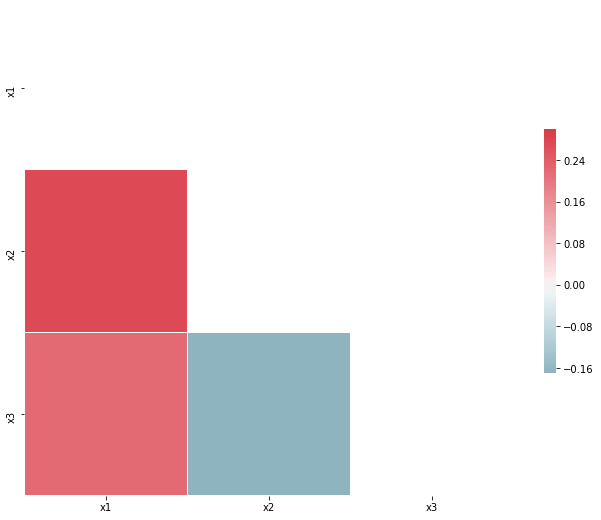

In [292]:
corr = df.iloc[:,0:3].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# PCA

In [293]:
#Normalize the data
from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()
X = nscaler.fit_transform(X)

In [294]:
pca = PCA(2)
principalComponents = pca.fit(X)
newdata = pca.fit_transform(X)
principalDf = pd.DataFrame(data = newdata, columns = ['principal component 1', 'principal component 2'])

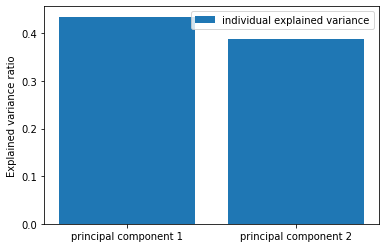

In [295]:
var = pca.explained_variance_ratio_
plt.bar(principalDf.columns, var, label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

### Visualize the 2D Blobs

In [296]:
#Add target column to principal dataframe
principalDf['label'] = y

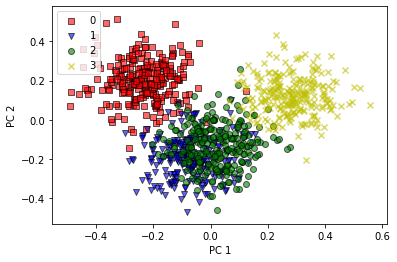

In [297]:
# Plot data points, given labels
X, y = principalDf.iloc[:,0:2].values, principalDf.iloc[:,-1].values
markers = ('s', 'v', 'o', 'x') 
colors = ('r', 'b', 'g', 'y')
cmap = ListedColormap(colors[:len(np.unique(y))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha=0.6, 
                c=[cmap(idx)],
                edgecolor='black',
                marker=markers[idx], 
                label=cl)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.show()

### Splitting the data

In [298]:
#X, y = principalDf.iloc[:,0:2].values, principalDf.iloc[:,-1].values
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y, random_state=0)

# Logistic Regression

In [299]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
def plot_decision_region(X, y, classifier, resolution=0.01):
    # Does not work....always....Setup marker generator and color map: FIXED!
    markers = ('s', 'v', 'o', 'x') 
    colors = ('r', 'b', 'g', 'y')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Z is the prediction of the class, given point in plane
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Z=f(xx1,yy1), plot classes in plane using color map but opaque
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points, given labels
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

### Plot decision boundry for training set

In [301]:
def dec_boundry_train_set(X_train, y_train, classifier):
    plot_decision_region(X_train, y_train, classifier)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='lower left')
    plt.show()

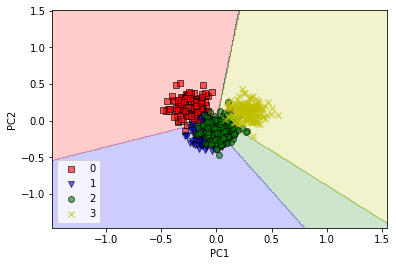

In [302]:
dec_boundry_train_set(X_train, y_train, lr)

### Plot decision boundry for test set

In [303]:
# plot decision regions for test set
def dec_boundry_test_set(X_train, y_train, classifier):
    plot_decision_region(X_test, y_test, classifier)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='lower left')
    plt.show()

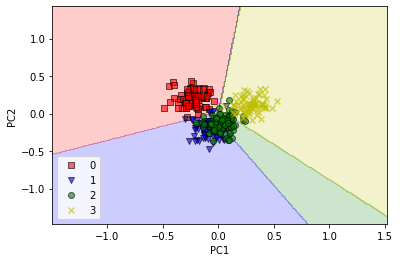

In [304]:
dec_boundry_test_set(X_train, y_train, lr)

### Inspecting the distributions of true and false positives and negatives using Confusion Matrix

In [305]:
 def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#### Confusion matrix for training set

Confusion matrix, without normalization
[[172   1   1   1]
 [  8 144  21   2]
 [  7  89  62  17]
 [  0   0   0 175]]


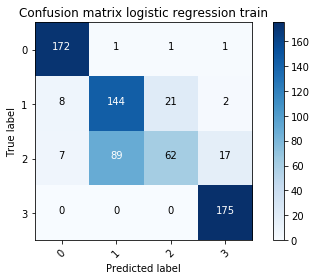

In [306]:
Y_train_pred = lr.predict(X_train)
cmtr = confusion_matrix(y_train, Y_train_pred)
np.set_printoptions(precision=2)
class_names = ['0', '1', '2', '3']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names, title='Confusion matrix logistic regression train')

#### Confusion matrix for test set

Confusion matrix, without normalization
[[75  0  0  0]
 [ 4 63  7  1]
 [ 2 33 32  8]
 [ 0  0  0 75]]


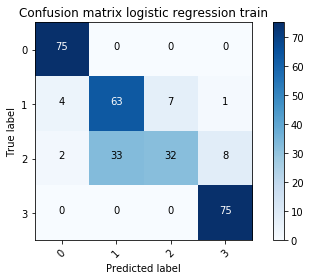

In [307]:
Y_test_pred = lr.predict(X_test)
cmtr = confusion_matrix(y_test, Y_test_pred)
np.set_printoptions(precision=2)
class_names = ['0', '1', '2', '3']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names, title='Confusion matrix logistic regression train')

# (b–optional) 2 touching parabola spreads as shown in the lecture, but in 3d (not 2d). Study and show elbow plot and prediction boundaries.

### 1st Parabola

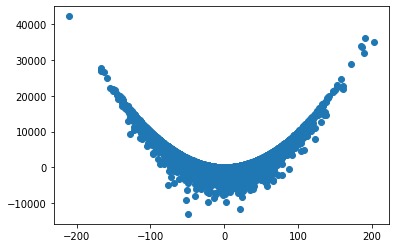

In [190]:
seed(226875)
sample_size = 7000
dummy = 30*randn(sample_size)
P_1_data1 = 50 * randn(sample_size) 
P_1_data2 = 50 * randn(sample_size) + P_1_data1*P_1_data1 - dummy*dummy
P_1_y = np.ones(sample_size)
pyplot.scatter(P_1_data1, P_1_data2)

pyplot.show()

### 2nd Parabola

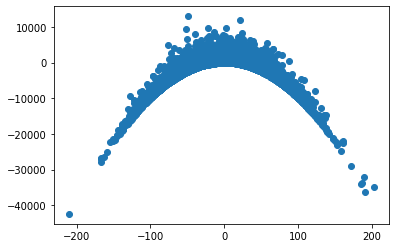

In [191]:
seed(226875)

dummy = 30*randn(sample_size)
P_2_data1 = 50 * randn(sample_size) 
P_2_data2 = 50 * randn(sample_size) - P_2_data1*P_2_data1 + dummy*dummy
P_2_y = np.zeros(sample_size)

pyplot.scatter(P_2_data1, P_2_data2)
pyplot.show()

### Combined

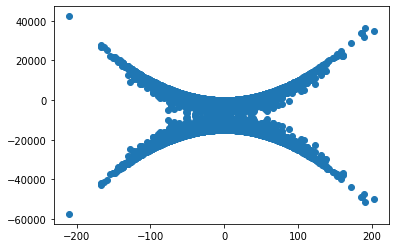

In [192]:
seed(226875)
dummy = 30 * randn(14000)

x1 = np.append(P_1_data1, P_2_data1)
x2 = np.append(P_1_data2, P_2_data2- 15000)
y = np.append(P_1_y, P_2_y)
pyplot.scatter(x1, x2)
pyplot.show()

### Plotting in 3D

In [193]:
# Adding 3rd dimention
x3 = x1 + x2 + dummy
d = {'x1': x1, 'x2': x2, 'x3': x3, 'y':y}
df = pd.DataFrame(data=d)
fig = px.scatter_3d(df,x='x1', y='x2', z='x3', color='y', symbol='y', opacity=0.6)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_traces(marker=dict(size=3),
                  line=dict(width=2,color='DarkSlateGrey'), 
                  selector=dict(mode='markers'),
                  showlegend=False)

### Extracting X and y from the data

In [194]:
#X, y = principalDf.iloc[:,0:2].values, principalDf.iloc[:,-1].values
# Split into training and testing sets
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values
y = y.astype(int)

### Correlation Martix

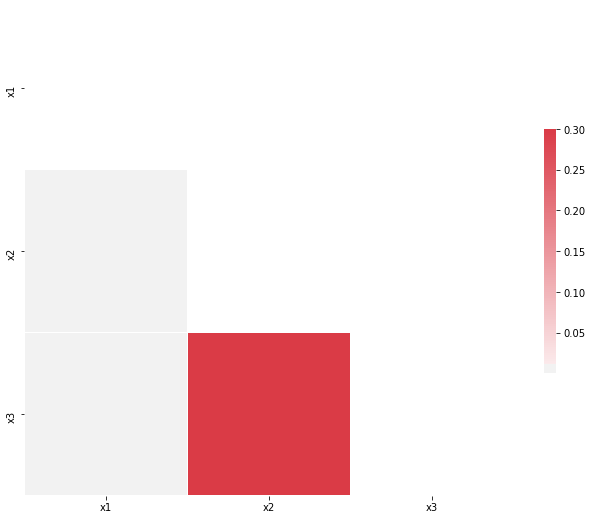

In [195]:
corr = pd.DataFrame(data=X, columns=['x1', 'x2', 'x3']).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Appling PCA

In [196]:
#Normalize the data

from sklearn import preprocessing
nscaler = preprocessing.MinMaxScaler()
X = nscaler.fit_transform(X)

In [197]:
pca = PCA(2)
principalComponents = pca.fit(X)
newdata = pca.fit_transform(X)
principalDf = pd.DataFrame(data = newdata, columns = ['principal component 1', 'principal component 2'])

### Explained Varience Ratio

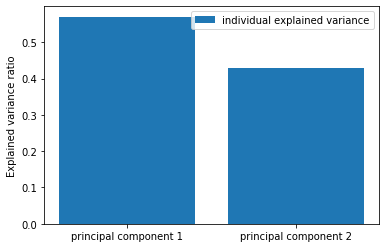

In [198]:
var = pca.explained_variance_ratio_
plt.bar(principalDf.columns, var, label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

In [199]:
# adding back the target label
principalDf['label'] = y

### Plot the PCA given data

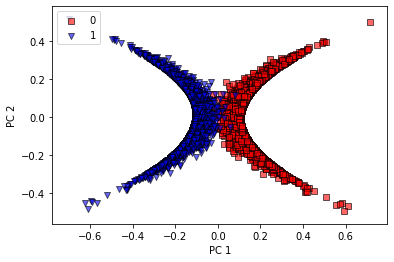

In [200]:
# Plot data points, given labels
X, y = principalDf.iloc[:,0:2].values, principalDf.iloc[:,-1].values
markers = ('s', 'v') 
colors = ('r', 'b')
cmap = ListedColormap(colors[:len(np.unique(y))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha=0.6, 
                c=[cmap(idx)],
                edgecolor='black',
                marker=markers[idx], 
                label=cl)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.show()

In [201]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y, random_state=0)

### Applying Logistic Regression

In [202]:
lr = LogisticRegression(solver='liblinear')
# solves task, given 3 classes (as from y_train) 
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Boundry for train set

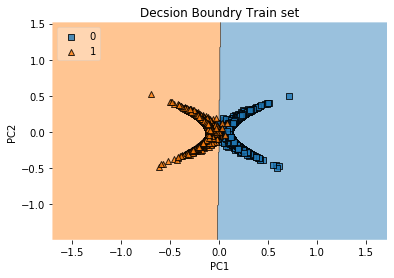

In [203]:
plot_decision_regions(X_train, y_train, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decsion Boundry Train set')
plt.show()

### Decision Boundry for test set

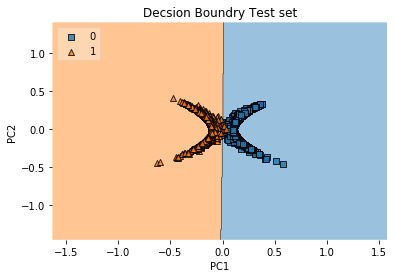

In [204]:
plot_decision_regions(X_test, y_test, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decsion Boundry Test set')
plt.show()

### Confusion matrix for train set

Confusion matrix, without normalization
[[4894    6]
 [   7 4893]]


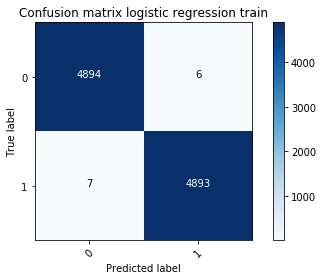

In [205]:
Y_train_pred = lr.predict(X_train)
cmtr = confusion_matrix(y_train, Y_train_pred)
np.set_printoptions(precision=2)
class_names = ['0', '1']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names, title='Confusion matrix logistic regression train')

### Confusion Martix for test set

Confusion matrix, without normalization
[[2097    3]
 [   3 2097]]


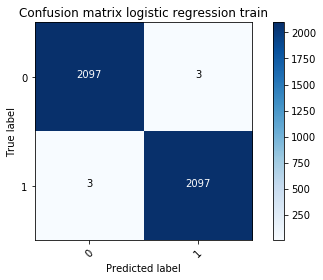

In [206]:
Y_test_pred = lr.predict(X_test)
cmtr = confusion_matrix(y_test, Y_test_pred)
np.set_printoptions(precision=2)
class_names = ['0', '1']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names, title='Confusion matrix logistic regression train')